# PROJECT 3

## CLASSIFICATION

### Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Dependencies are being imported to help access libraries. The 'warnings' package/library was imported so that, prompts which do not affect the output of codes will not be shown.

### Loading Dataset

Because of hyperparameter tuning, the notebook was run on Google colab. The google GPU run the codes faster than the local host(CPU). The first line below was used to upload the data before assigning it to 'Data'.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
Data=pd.read_csv('data.csv')

In [0]:
Data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


### Shape of Dataset

In [0]:
Data.shape

(38312, 17)

The shape of the data shows that, there are 38312 rows and 17 features.

### Correlation Matrix

Object/categorical features wouldn't be needed in the correlation plot. For this reason, they are be removed. 

In [6]:
Numeric_Data=Data.select_dtypes(exclude=['object'])
Numeric_Data.corr()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000


It is a little difficult reading the correlation matrix. A graphical representation will make it easier to understand the correlation between the numeric features.

### Giving a Graphical Representation of Correlation Matrix

Text(0.5, 1.05, 'Correlation Matrix')

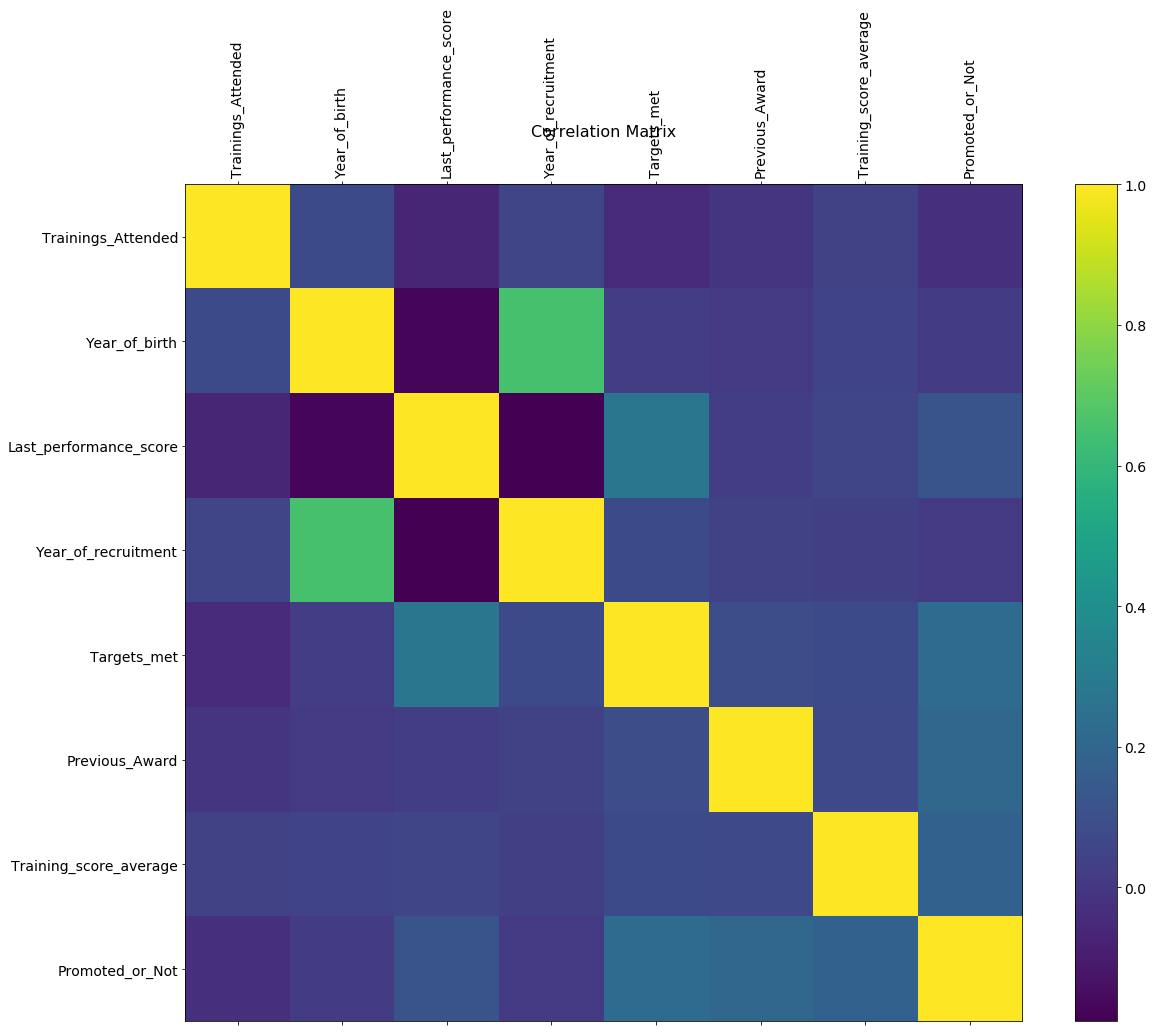

In [0]:
f=plt.figure(figsize=(19,15))
plt.matshow(Numeric_Data.corr(), fignum=f.number)
plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.yticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

There is a strong positive correlation (0.65) between 'Year of birth' and 'Year of recruitment'. 'Last_performance_score also has a positive correlation with 'Target_met'. The target variable has a positive correlation with 'Last_performance_score' (0.12), 'Target_met'(0.22),'Previous_Award'(0.20) and 'Training_score_average'(0.18)

### Checking for Missing Values 

In [7]:
Data.isna().mean().round(4) * 100

EmployeeNo                             0.00
Division                               0.00
Qualification                          4.38
Gender                                 0.00
Channel_of_Recruitment                 0.00
Trainings_Attended                     0.00
Year_of_birth                          0.00
Last_performance_score                 0.00
Year_of_recruitment                    0.00
Targets_met                            0.00
Previous_Award                         0.00
Training_score_average                 0.00
Foreign_schooled                       0.00
Past_Disciplinary_Action               0.00
Previous_IntraDepartmental_Movement    0.00
No_of_previous_employers               0.00
Promoted_or_Not                        0.00
dtype: float64

In [8]:
Data.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
Foreign_schooled                          0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

'Qualification' is the only featurre with mising values. 1679 representing 4.38% of the 'Qualification' observation is missing. This is a categorical feature.

### Missing Value Imputation 

#### Checking to see the qualification with the most observations (count)

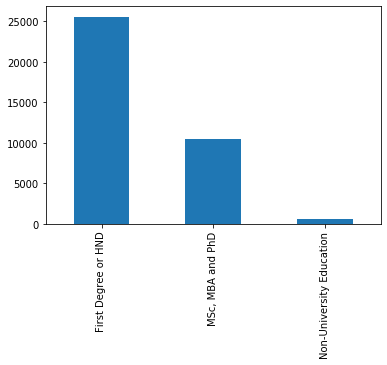

In [0]:
Data['Qualification'].value_counts().plot(kind='bar')

#### Replacing missing values with 'First Degree or HND' 

In [0]:
Data['Qualification'].fillna("First Degree or HND", inplace=True)

In [0]:
Data.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

The missing values are being imputed using the modal category,"First Degree or HND". This method is used because it is easy to understand and implemented.

## Feature Engineer

#### Creating 'Age' feature by subtracting the year of birth of each employee from 2019 

In [0]:
Data['Age'] = 2019-Data['Year_of_birth']

The age of an employee is being calculated. By subtracting the 'Year of birth' from current year, we get the age of each employee.

#### Creating 'Years with Establishment' feature by subtracting the year_of_recruitment of each employee from 2019

In [0]:
Data['Years with Establishment'] = 2019-Data['Year_of_recruitment']

The 'Year_of_Recruitment' is being subtracted from the current year. This gives the number of years each employee has been with the establishment

#### Creating whether or not a staff started his/her career at the firm 

In [0]:
Data['Entry at company']=np.where(Data['No_of_previous_employers']=='0','Yes','No')

To know whether or not an employee started his/her career with the company, employees who have had previous employers are assigned 'No' and 'Yes' otherwise. 

#### Using last performance score of an employee and whether or not they met their target to determine their dedication

An employee is considered dedicated if they scored above 7 in their last performance assessment and also met their target

In [0]:
for i, row in Data.iterrows():
    if (Data.loc[i, 'Last_performance_score']>6 and Data.loc[i, 'Targets_met']==1):
        Data.loc[i, 'Dedication']='Dedicated'
    else:
        Data.loc[i, 'Dedication']='Not dedicated'
    

#### Categorizing Last Performance Score into Low, Average and High 

In [0]:
Perf_Score=[]

# Using a for loop to populate the list
for score in Data['Last_performance_score']:
    if (score>-1 and score<6):
         Perf_Score.append('Low')
    elif (score>4 and score<11):
         Perf_Score.append('Average')
    else:
         Perf_Score.append('High')

# Storing the data as a column in Data_With_New_Features
Data['Perfomance Rating'] = Perf_Score

#### Creating New Feature, Training and Award

This feature categorizes employees into Few trainings without award, Few trainings with award,More trainings with award and More trainings without award.
Employees who have attended more than 5 trainings and have no rewards are categorized as 'Few trainings without award'.
Less than 5 trainings with awards as 'Few trainings with award ' and so on.

In [0]:
for i, row in Data.iterrows():
    if (Data.loc[i, 'Trainings_Attended']<6 and Data.loc[i, 'Previous_Award']==0):
        Data.loc[i, 'Training and Award']='Few trainings without award'
    elif (Data.loc[i, 'Trainings_Attended']<6 and Data.loc[i, 'Previous_Award']==1):
        Data.loc[i, 'Training and Award']='Few trainings with award'
    elif (Data.loc[i, 'Trainings_Attended']>5 and Data.loc[i, 'Previous_Award']==1):
        Data.loc[i, 'Training and Award']='More trainings with award'
    else:
        Data.loc[i, 'Training and Award']='More trainings without award'

In [0]:
Data['Training and Award'].value_counts()

Few trainings without award     37287
Few trainings with award          885
More trainings without award      138
More trainings with award           2
Name: Training and Award, dtype: int64

More employees have gone for few trainings and has an award. Only two employees have had more trainings and has awards.

## EDA 

## Summary Statistics for Features

In [0]:
Data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNo,38312,38312,YAK/S/27063,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Division,38312,9,Commercial Sales and Marketing,11695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qualification,38312,3,First Degree or HND,27257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,38312,2,Male,26880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_of_Recruitment,38312,3,Agency and others,21310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trainings_Attended,38312,NaN,NaN,NaN,2.25368,0.609443,2,2,2,2,11
Year_of_birth,38312,NaN,NaN,NaN,1986.21,7.64605,1950,1982,1988,1992,2001
Last_performance_score,38312,NaN,NaN,NaN,7.69896,3.74414,0,5,7.5,10,12.5
Year_of_recruitment,38312,NaN,NaN,NaN,2013.14,4.26145,1982,2012,2014,2016,2018
Targets_met,38312,NaN,NaN,NaN,0.352996,0.477908,0,0,0,1,1


The table above summarizes the modal, mean, max and percentiles for the various features.

#### KDE plot for Last Performance Score

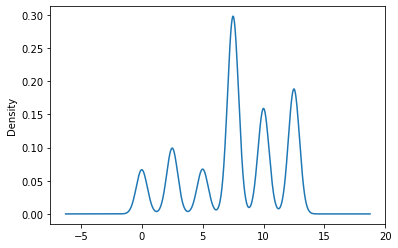

In [0]:
Data.Last_performance_score.plot.kde()

#### KDE plot for Training Score Average

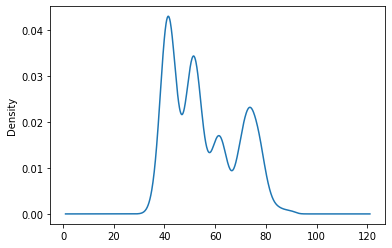

In [0]:
Data.Training_score_average.plot.kde()

#### Pie Chart showing the number of employees who met their target from the various Training and Award categories

In [0]:
Data.groupby('Training and Award').sum()['Targets_met'].sort_values(ascending=False)

Training and Award
Few trainings without award     12932
Few trainings with award          568
More trainings without award       23
More trainings with award           1
Name: Targets_met, dtype: int64

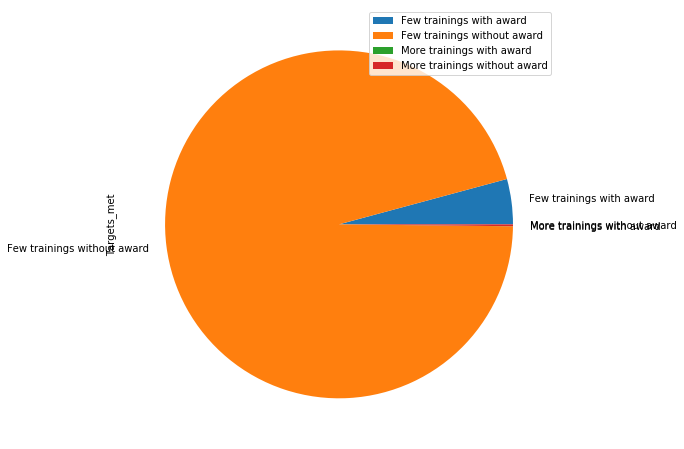

In [0]:
Data.groupby('Training and Award').sum().plot(kind='pie', y='Targets_met', figsize=(18,8))

#### Percentage of Each Qualification with Promotion

In [0]:
Percentage_Promoted=Data.groupby('Qualification')['Promoted_or_Not'].mean()*100
Percentage_Promoted

Qualification
First Degree or HND         7.986939
MSc, MBA and PhD            9.666635
Non-University Education    8.873720
Name: Promoted_or_Not, dtype: float64

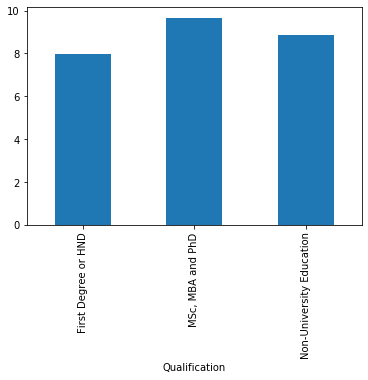

In [0]:
Percentage_Promoted.plot(kind='bar')

The diagrams and table above shows that, approximately 8% of First Degree or HND holders get promoted. MSc,MBA and PHD holders and Non-University Education holders have 10% and 9% respectively.

#### Average Age of Promoted Employees and Non-Promoted Employees

In [0]:
Data.groupby('Promoted_or_Not')['Age'].mean()

Promoted_or_Not
0    32.832483
1    32.338167
Name: Age, dtype: float64

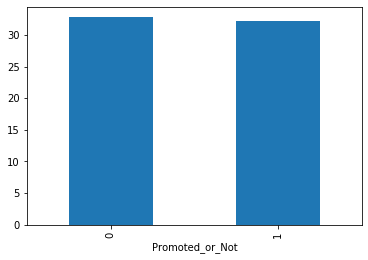

In [0]:
Data.groupby('Promoted_or_Not')['Age'].mean().plot(kind='bar')

The average age of promoted and non-promoted are 32.3 and 32.8 respectively.

####  Boxplot Showing Last Performance Score for Promoted and Unpromoted Employees

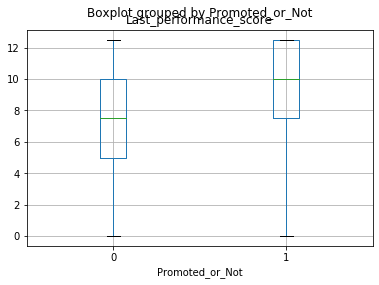

In [0]:
Data.boxplot(by='Promoted_or_Not', column=['Last_performance_score'], grid=True)

The boxplot above shows that, employees who are promoted have a higher performance score than those who are not promoted. Employees promoted have an average score of 10 but the unpromoted has an average less than 8.

####  Boxplot Showing Age Distribution for Promoted and Unpromoted Employees

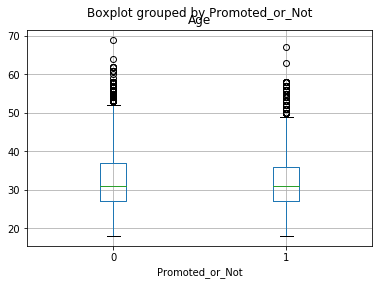

In [0]:
Data.boxplot(by='Promoted_or_Not', column=['Age'], grid=True)

####  Boxplot Showing Last Performance Score for Foreign Schooled and Locally Schooled Employees

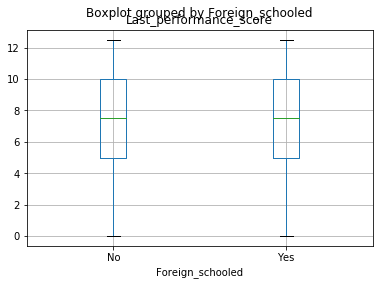

In [0]:
Data.boxplot(by='Foreign_schooled', column=['Last_performance_score'], grid=True)

#### Barplot Showing the Perfomance Score for Male and Female Employees in the Various Divisions

<Figure size 1368x1080 with 0 Axes>

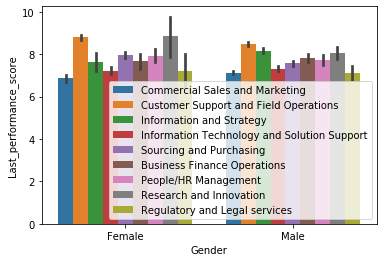

<Figure size 1368x1080 with 0 Axes>

In [0]:
sns.barplot(x='Gender',y='Last_performance_score',data=Data,hue='Division')
plt.legend(loc='best')
plt.figure(figsize=(19,15))

Females have a higher performance score in almost all of the divisions but the difference isn't much.

#### Barplot Showing the Perfomance Score for Foreign and Locally Schooled Employees for Whether or Not They Met Their Target

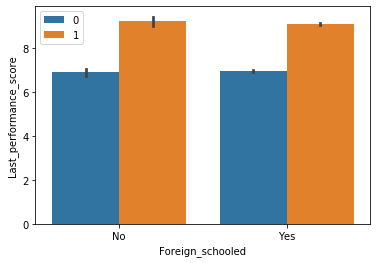

In [0]:
sns.barplot(x='Foreign_schooled',y='Last_performance_score',data=Data,hue='Targets_met')
plt.legend(loc='best')

This plot shows that whether an employee was foreign schooled or not, it doesn't affect their performance score

#### Barplot Showing the Perfomance Score for Performance Rating for Whether or Not They are Dedication

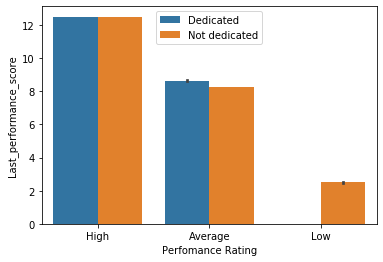

In [0]:
sns.barplot(x='Perfomance Rating',y='Last_performance_score',data=Data,hue='Dedication')
plt.legend(loc='best')

Employees with a high performance rating perform better irrespective of their dedication to the firm. Employees with average performance rating and are dedicated perform better than those in same category but are not dedicated. Employees with low performance rating are not dedicated and get low performance score.

### Checking For Class Imbalance

Plotting a histogram to give a graphical presentation of imbalance

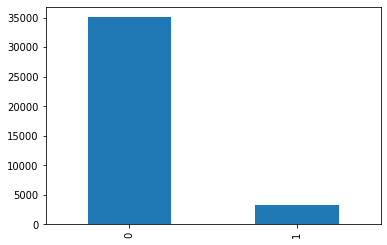

In [0]:
Data['Promoted_or_Not'].value_counts().plot(kind='bar')

#### Calculating Percentage of Minority and Majority Classes

In [0]:
(Data['Promoted_or_Not'].value_counts()/38312)*100

0    91.54051
1     8.45949
Name: Promoted_or_Not, dtype: float64

There is class imbalance. The minority class has a percentage of 8.45949% to 91.54051%.

#### Dropping Employee ID

In [0]:
Data.drop('EmployeeNo', axis=1, inplace=True)

#### Selecting Object Variables for Encoding

In [0]:
Object_data=Data.select_dtypes(include=['object'])

#### OneHot Encoding Object Variables

In [0]:
Object_data_dummies = pd.get_dummies(Object_data)

#### Merging Encoded Variables to The Original Data 

In [0]:
Data_for_Model = pd.concat([Data, Object_data_dummies], axis=1)

#### Dropping Object Features From The Final Data 

In [0]:
Data_for_Model = Data_for_Model.select_dtypes(exclude=['object'])

### Using Synthetic Minority Oversampling Technique

#### Importing Smote from Imblearn Package 

In [21]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### Separating input features and target 

In [0]:
y=Data_for_Model['Promoted_or_Not']
x=Data_for_Model.drop('Promoted_or_Not',axis=1)

#### Scaling Data 

Data scaling was done because the values for the features are not on the same scale. For example, year of birth and performance score are on different scales.

In [0]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
x=scaler.fit_transform(x) 

#### Splitting data into test and train data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Using SMOTE to Oversample Observations

In [0]:
sm=SMOTE(random_state=42,ratio=1.0)
X_train,y_train=sm.fit_sample(X_train,y_train)

In [0]:
#score(X_train,y_train)

In [0]:
sum(y_train == 1)

28075

In [0]:
sum(y_train == 0)

28075

### Importing Dependencies for Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Models and evaluation metrics are imported from Scikit Learn

### Binary Logistic Regression

In [0]:
lr = LogisticRegression()

#### Hyperparameter Tuning for Logistic Regression

In [0]:
penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]

solver = ['liblinear', 'saga']



param_grid = dict(penalty=penalty,

                  C=C,

                  class_weight=class_weight,

                  solver=solver)



grid = GridSearchCV(estimator=lr,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 19.1min finished


Best Score:  0.815383484114896
Best Params:  {'C': 0.01, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}


#### Fitting Model Using Best Parameters from GridSearch

In [0]:
lr = LogisticRegression(C= 0.01, class_weight= {1: 0.6, 0: 0.4}, penalty= 'l2', solver= 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting Using Test Data

In [0]:
lr_pred = lr.predict(X_test)

#### Confusion Matrix

In [0]:
confusion_matrix(y_test, lr_pred)

array([[4908, 2088],
       [  74,  593]])

#### Accuracy Score for Logistic Regression Model

In [0]:
logit_acc=accuracy_score(y_test, lr_pred)

#### Prediction Score for Logistic Regression Model

In [0]:
logit_pre=precision_score(y_test, lr_pred,average='macro')

#### Recall Score for Logistic Regression Model

In [0]:
logit_recall=recall_score(y_test, lr_pred,average='macro')

#### F1 Score for Logistic Regression Model

In [0]:
logit_f1=f1_score(y_test, lr_pred,average='macro')

In [0]:
logit_f1

0.5868718796088328

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      6996
           1       0.22      0.89      0.35       667

    accuracy                           0.72      7663
   macro avg       0.60      0.80      0.59      7663
weighted avg       0.92      0.72      0.78      7663



#### 5 fold Cross Validation for Logistic Regression Model

In [0]:
logit_scores=cross_val_score(lr,X_train,y_train,cv=5)

#### Cross Validation Scores for The 5 folds

In [0]:
logit_scores

array([0.8158504 , 0.82048085, 0.81665183, 0.81994657, 0.81629564])

#### Mean Score For Cross Validation

In [0]:
logit_scores.mean()

0.8178450578806767

#  

### Decision Tree Classifier

In [0]:
dtc= DecisionTreeClassifier()

#### Hyperparameter Tuning for Decision Tree Classifier

In [0]:
max_depth=[5,10,20]
max_leaf_nodes=[5,10,20]
criterion=['gini','entropy']
presort=[True,False]

param_grid = dict(criterion=criterion,presort=presort,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes)



grid = GridSearchCV(estimator=dtc,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   45.1s finished


Best Score:  0.836585026519409
Best Params:  {'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 20, 'presort': True}


#### Fitting Model Using Best Parameters from GridSearch

In [0]:
dtc= DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_leaf_nodes= 20, presort= True)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

#### Predicting Using Test Data

In [0]:
dtc_pred = dtc.predict(X_test)

#### Confusion Matrix

In [0]:
confusion_matrix(y_test, dtc_pred)

array([[5249, 1747],
       [ 158,  509]])

#### Accuracy Score for Decision Tree Classifier

In [0]:
dtc_acc=accuracy_score(y_test, dtc_pred)

#### Precision Score for Decision Tree Classifier

In [0]:
dtc_pre=precision_score(y_test, dtc_pred,average='macro')

#### Recall Score for Decision Tree Classifier

In [0]:
dtc_recall=recall_score(y_test, dtc_pred,average='macro')

#### F1 Score for Decision Tree Classifier

In [0]:
dtc_f1=f1_score(y_test, dtc_pred,average='macro')

In [0]:
dtc_f1

0.5973402250109499

#### Classification Report

In [0]:
print(classification_report(y_test,  dtc_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      6996
           1       0.23      0.76      0.35       667

    accuracy                           0.75      7663
   macro avg       0.60      0.76      0.60      7663
weighted avg       0.91      0.75      0.80      7663



#### 5 Fold Cross Validation for Decision Tree Classifier

In [0]:
dtc_scores=cross_val_score(dtc,X_train,y_train,cv=5)

#### Cross Validation Score For The 5 Folds

In [0]:
dtc_scores

array([0.80436331, 0.85992876, 0.85503117, 0.83392698, 0.83259127])

#### Average Score for The 5 Folds

In [0]:
dtc_scores.mean()

0.8371682991985752

#  

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

#### Hyperparameter Tuning for Random Forest 

In [0]:

max_features = ['auto', 'sqrt']
criterion=['gini','entropy']
bootstrap=[True,False]
n_estimators=[10,100,1000]
param_grid = dict(criterion=criterion,bootstrap=bootstrap,n_estimators=n_estimators,max_features=max_features)



grid = GridSearchCV(estimator=rf,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 44.2min finished


Best Score:  0.9617367205104191
Best Params:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000}


#### Fitting Model Using Best Parameters from GridSearch

In [0]:
rf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', n_estimators= 1000, max_features= 'auto', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Predicting Using Test Data

In [0]:
rf_pred=rf.predict(X_test)

#### Confusion Matrix

In [0]:
confusion_matrix(y_test, rf_pred)

array([[6807,  189],
       [ 472,  195]])

#### Accuracy Score for Random Forest Classifier

In [0]:
rf_acc=accuracy_score(y_test, rf_pred)

#### Precision Score for Random Forest Classifier

In [0]:
rf_pre=precision_score(y_test, rf_pred,average='macro')

#### Recall Score for Random Forest Classifier

In [0]:
rf_recall=recall_score(y_test, rf_pred,average='macro')

#### F1 Score for Random Forest Classifier

In [0]:
rf_f1=f1_score(y_test, rf_pred,average='macro')

In [0]:
rf_f1

0.6623852189808389

In [0]:
print(classification_report(y_test,  rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6996
           1       0.51      0.29      0.37       667

    accuracy                           0.91      7663
   macro avg       0.72      0.63      0.66      7663
weighted avg       0.90      0.91      0.90      7663



#### 5 Fold Cross Validation for Random Forest Classifier

In [0]:
rf_scores=cross_val_score(rf,X_train,y_train,cv=5)

#### Cross Validation Score for the 5 Folds (Random Forest Classifier)

In [0]:
rf_scores

array([0.87916296, 0.98254675, 0.98459484, 0.98067676, 0.98308103])

#### Average Cross Validation Score (Random Forest Classifier)

In [0]:
rf_scores.mean()

0.962012466607302

#  

### Support Vector Machine

In [0]:
from sklearn import svm
sv = svm.SVC(kernel='linear') 

#### Hyperparameter Tuning for Support Vector Machine

In [30]:
C = [0.01, 0.1]
gamma=[0.01,0.1]
param_grid = dict(C=C,gamma=gamma)



grid = GridSearchCV(estimator=sv,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.0min finished


Best Score:  0.8141940818459585
Best Params:  {'C': 0.1, 'gamma': 0.01}


#### Fitting Model Using Best Parameters from GridSearch

In [31]:
sv = svm.SVC(kernel='linear',C=0.1,gamma=0.01,probability=True) 
sv.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### Predicting Using Test Data

In [0]:
sv_pred = sv.predict(X_test)

#### Confusion Matrix For SVM Predictor

In [0]:
confusion_matrix(y_test, sv_pred)

array([[4919, 2077],
       [  64,  603]])

#### Accuracy Score for SVM

In [0]:
svm_acc=accuracy_score(y_test, sv_pred)

#### Precision Score for SVM

In [0]:
svm_pre=precision_score(y_test, sv_pred,average='macro')

#### Recall Score for SVM

In [0]:
svm_recall=recall_score(y_test, sv_pred,average='macro')

#### F1 Score for SVM

In [0]:
svm_f1=f1_score(y_test, sv_pred,average='macro')

In [34]:
svm_f1

0.5927835051546392

In [0]:
print(classification_report(y_test,  sv_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      6996
           1       0.23      0.90      0.36       667

    accuracy                           0.72      7663
   macro avg       0.61      0.80      0.59      7663
weighted avg       0.92      0.72      0.78      7663



#### 5 Fold Cross Validation for SVM

In [0]:
sv_scores=cross_val_score(sv,X_train,y_train,cv=5)

#### Cross Validation Score for 5 folds

In [0]:
sv_scores

array([0.81558326, 0.8173642 , 0.81442565, 0.81629564, 0.81656278])

#### Average Cross Validation Score for SVM

In [0]:
sv_scores.mean()

0.8160463045414069

#  

### xgBoost

#### Splitting Data Into Test and Train Datasets

In [0]:
X_boost_train,X_boost_test,y_boost_train,y_boost_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Applying SMOTE on Data

In [0]:
X_boost_train,y_boost_train=sm.fit_sample(X_boost_train,y_boost_train)

In [0]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

#### Hyperparameter Tuning for XGBoost

Gamma and learning rate are the only hyperparameters tuned. This was because, it took a lot of time running. 

In [0]:

gamma=[ 0.001,0.01, 0.1]
learning_rate=[0.001, 0.01,0.1]

param_grid = dict(gamma=gamma,learning_rate=learning_rate)



grid = GridSearchCV(estimator=xgboost,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.8min finished


Best Score:  0.90946261454563
Best Params:  {'gamma': 0.001, 'learning_rate': 0.1}


#### Fitting Model Using Best Parameters from GridSearch

In [0]:
xgb.XGBClassifier(random_state=42,learning_rate=0.1,gamma=0.001)
xgboost.fit(X_boost_train, y_boost_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Predicting Using Test Data

In [0]:
xgb_pred = xgboost.predict(X_boost_test)

In [0]:
xgb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Confusion Matrix for XGBoost

In [0]:
confusion_matrix(y_boost_test, xgb_pred)

array([[4587, 2409],
       [  91,  576]])

#### Accuracy Score for XGBoost

In [0]:
xgb_acc=accuracy_score(y_boost_test, xgb_pred)

#### Precision Score for XGBoost

In [0]:
xgb_pre=precision_score(y_boost_test, xgb_pred,average='macro')

#### Recall Score for XGBoost

In [0]:
xgb_recall=recall_score(y_boost_test, xgb_pred,average='macro')

#### F1 Score for XGBoost

In [0]:
xgb_f1=f1_score(y_boost_test, xgb_pred,average='macro')

In [0]:
xgb_f1

0.5506462437661621

In [0]:
print(classification_report(y_boost_test,  xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      6996
           1       0.19      0.86      0.32       667

    accuracy                           0.67      7663
   macro avg       0.59      0.76      0.55      7663
weighted avg       0.91      0.67      0.74      7663



#### 5 Fold Cross Validation for XGBoost

In [0]:
xgb_scores=cross_val_score(xgboost,X_boost_train,y_boost_train,cv=5)

#### Cross Validation Score for XGBoost

In [0]:
xgb_scores

array([0.7762244 , 0.79047195, 0.78744435, 0.79189671, 0.78797863])

#### Average Cross Validation Score for XGBoost

In [0]:
xgb_scores.mean()

0.7868032056990205

#  

## Creating a Table for Score Metrics for The Various Models

The table has accuracy, precision, recall and f1 score for the various. The table is sorted in descending of the f1 score.

In [0]:
Summary=[['Binary Logistic Regression',logit_acc,logit_pre,logit_recall,logit_f1],
      [ 'Decision Tree Classifier',dtc_acc,dtc_pre,dtc_recall,dtc_f1],
      [ 'Random Forest Classifier',rf_acc,rf_pre,rf_recall,rf_f1],
      [ 'Support Vector Machine Classifier',svm_acc,svm_pre,svm_recall,svm_f1],
      [ 'xgBoost Classifier',xgb_acc,xgb_pre,xgb_recall,xgb_f1] 
]

Performance_Summary=pd.DataFrame(Summary)

#### Renaming Columns

In [0]:
Performance_Summary.columns=['Classifier','Accuracy','Precision','Recall','F1 Score']

#### Sorting Models by Their F1 Score in Descending Order

In [0]:
Performance_Summary.sort_values(by='F1 Score', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score
2,Random Forest Classifier,0.913741,0.721484,0.632669,0.662385
1,Decision Tree Classifier,0.751403,0.598200,0.756702,0.597340
3,Support Vector Machine Classifier,0.720606,0.606078,0.803582,0.590797
0,Binary Logistic Regression,0.717865,0.603166,0.795300,0.586872
4,xgBoost Classifier,0.673757,0.586756,0.759614,0.550646


## ROC Curve For Models

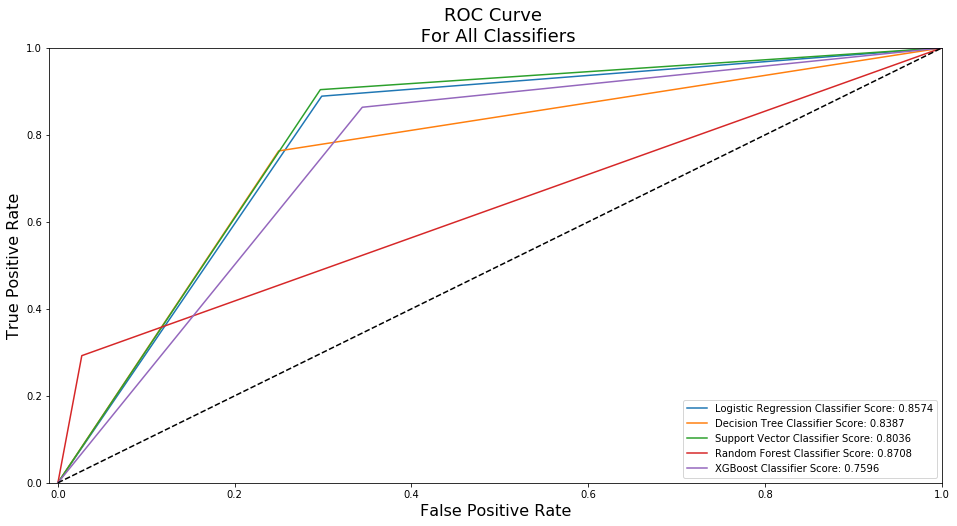

In [0]:
#Importing Dependencies
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Assigning the True Positive Rate, False Positive Rate and Threshold for the 5 Models
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, dtc_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, sv_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_boost_test, xgb_pred)


#Method to plot the ROC Curve
def graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n For All Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])))
    plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, sv_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_boost_test, xgb_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

#Calling function and passing the fpr and tpr for the various models    
graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr)
plt.show()

## Feature Importance

In [0]:
columns=Data_for_Model.drop('Promoted_or_Not',axis=1).columns

#### Feature Importance for Logistic Regression

In [0]:
Linear_Corr_Table=Data_for_Model.corr()['Promoted_or_Not'].drop(['Promoted_or_Not'])

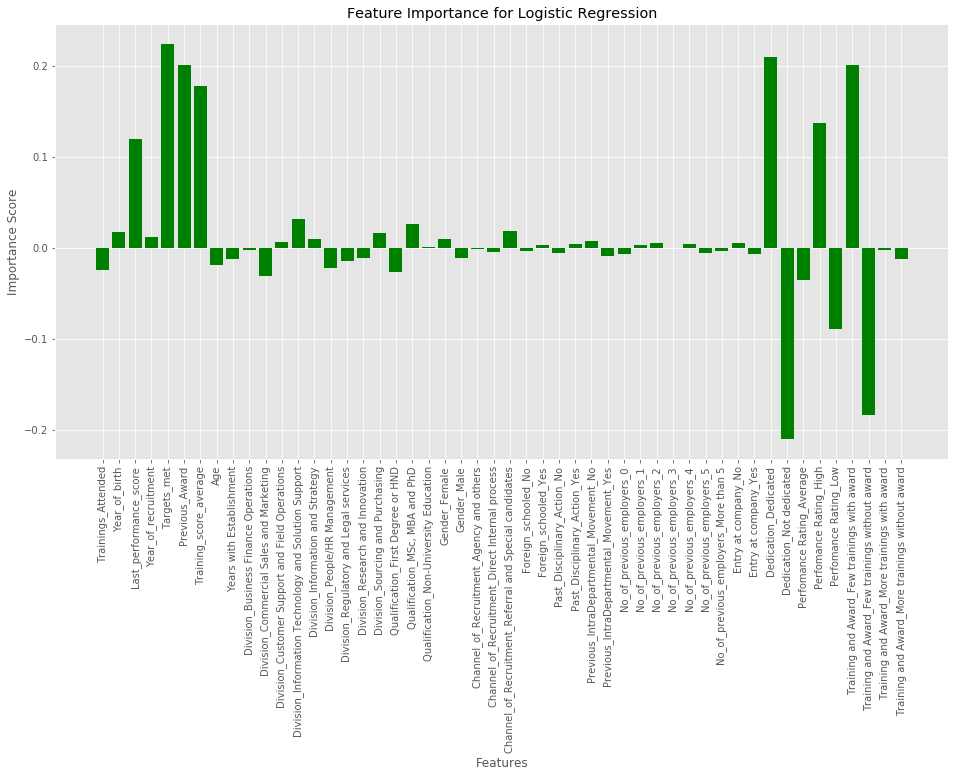

In [0]:
plt.style.use('ggplot')

lr_col = columns
lr_scores = Linear_Corr_Table

lr_pos = [i for i, _ in enumerate(lr_col)]

plt.figure(figsize=(16,8))
plt.bar(lr_pos, lr_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Logistic Regression")
plt.xticks(lr_pos,lr_col,rotation=90)

plt.show()

In [0]:
Logistic_importance_mean=np.mean(Linear_Corr_Table)

#### Feature Importance for Decision Tree

In [0]:
dtc_feature_imp = pd.DataFrame(dtc.feature_importances_,columns)

In [0]:
dtc_feature_imp.columns=['Importance']

In [0]:
dtc_feature_imp.sort_values(by='Importance', ascending=False)

,Importance
Targets_met,0.375585
Training_score_average,0.227014
Perfomance Rating_High,0.126828
Division_Commercial Sales and Marketing,0.091202
Last_performance_score,0.055053
Trainings_Attended,0.050283
Training and Award_Few trainings with award,0.023259
Division_Sourcing and Purchasing,0.019157
Division_Customer Support and Field Operations,0.016239
Perfomance Rating_Average,0.015380


In [0]:
DecisionTree_importance_mean=np.mean(dtc_feature_imp.Importance)


#### Plotting Bar Chart For Feature Importance (Decision Tree)

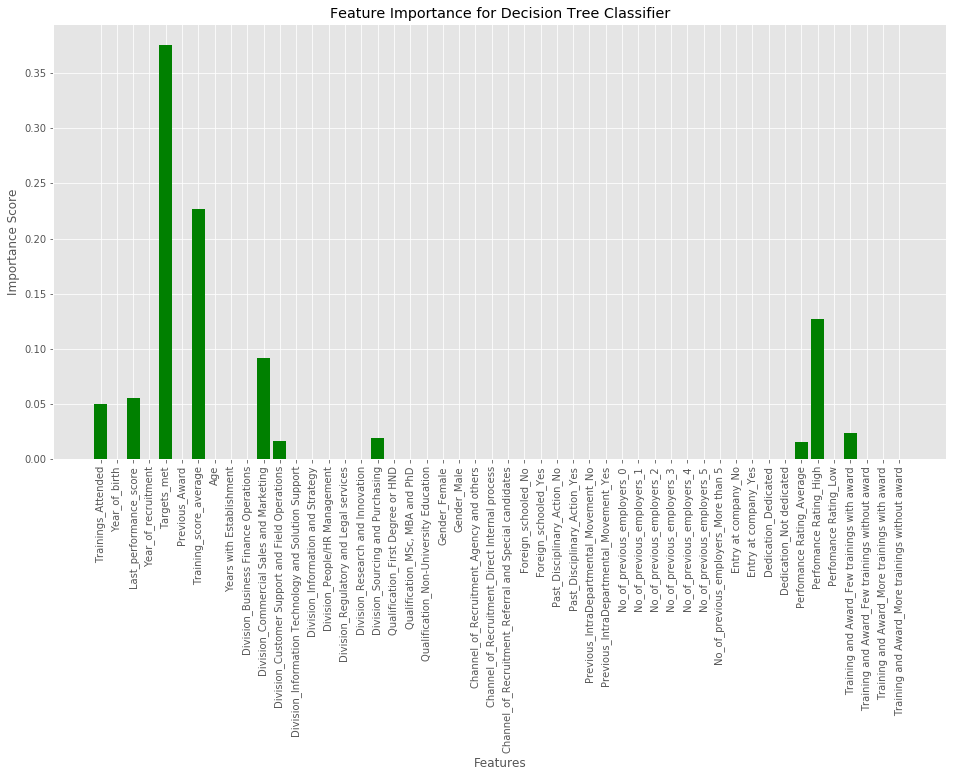

In [0]:
plt.style.use('ggplot')

dtc_col = columns
dtc_scores = dtc.feature_importances_

dtc_pos = [i for i, _ in enumerate(dtc_col)]

plt.figure(figsize=(16,8))
plt.bar(dtc_pos, dtc_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(dtc_pos,dtc_col,rotation=90)

plt.show()

#### Feature Importance for Random Forest

In [0]:
rf_feature_imp = pd.DataFrame(rf.feature_importances_,columns)

In [0]:
rf_feature_imp.columns=['Importance']

In [0]:
rf_feature_imp.sort_values(by='Importance', ascending=False)

,Importance
Training_score_average,0.158670
Targets_met,0.081231
Last_performance_score,0.078252
Years with Establishment,0.061548
Year_of_recruitment,0.061172
Year_of_birth,0.053052
Age,0.052748
Dedication_Dedicated,0.036774
Division_Commercial Sales and Marketing,0.036448
Trainings_Attended,0.036242


In [0]:
RandomForest_importance_mean=np.mean(rf_feature_imp.Importance)


#### Bar Chart For Feature Importance (Random Forest)

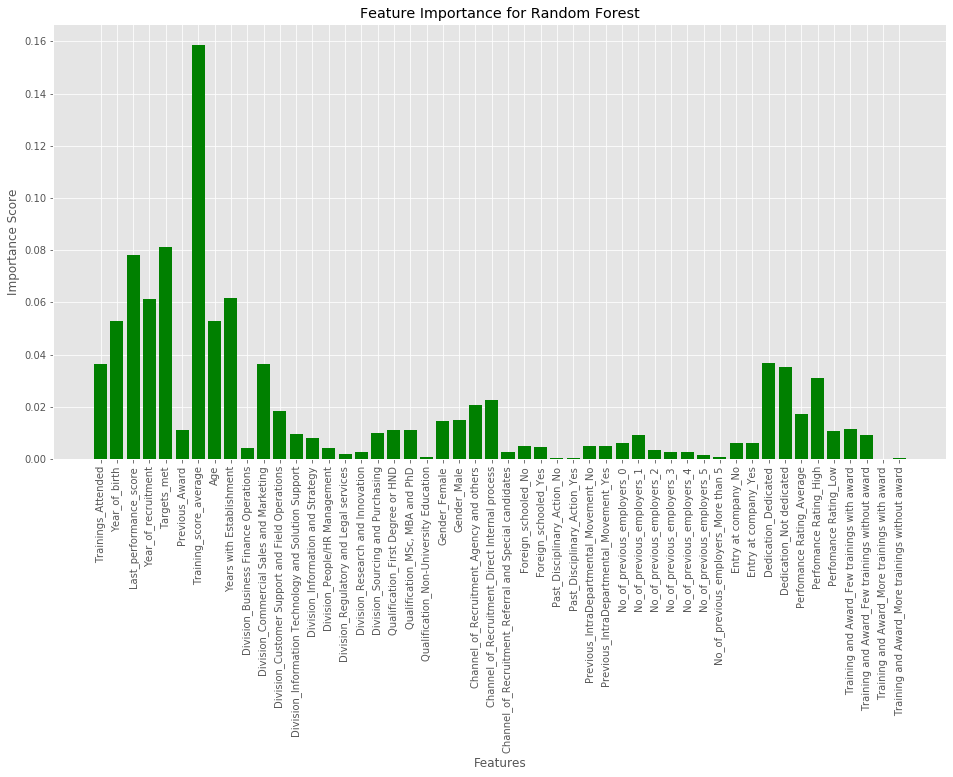

In [0]:
plt.style.use('ggplot')

rf_col = columns
rf_scores = rf.feature_importances_

rf_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(rf_pos, rf_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Random Forest")
plt.xticks(rf_pos,rf_col,rotation=90)

plt.show()

#### Feature Importance for XGBoost

In [0]:
xgboost_feature_imp = pd.DataFrame(xgboost.feature_importances_,columns)

In [0]:
xgboost_feature_imp.columns=['Importance']

In [0]:
xgboost_feature_imp.sort_values(by='Importance', ascending=False,)

,Importance
Targets_met,0.228876
Perfomance Rating_High,0.204978
Division_Commercial Sales and Marketing,0.178558
Last_performance_score,0.135352
Training_score_average,0.094827
Training and Award_Few trainings with award,0.072564
Trainings_Attended,0.041194
Year_of_recruitment,0.035660
Division_Information and Strategy,0.007991
No_of_previous_employers_4,0.000000


In [0]:
xgboost_importance_mean=np.mean(xgboost_feature_imp.Importance)


#### Bar Chart for Feature Importance (XGBoost)

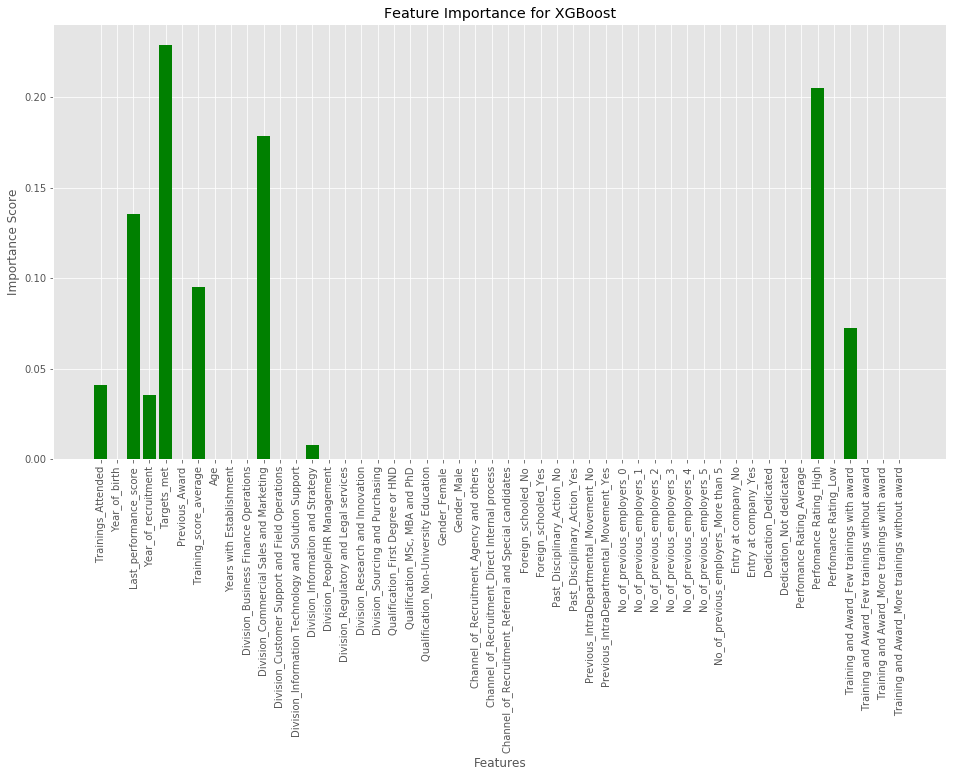

In [0]:
plt.style.use('ggplot')

xgb_col = columns
xgboost_scores = xgboost.feature_importances_

xgb_pos = [i for i, _ in enumerate(xgb_col)]

plt.figure(figsize=(16,8))
plt.bar(xgb_pos, xgboost_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for XGBoost")
plt.xticks(xgb_pos,xgb_col,rotation=90)

plt.show()

#### Feature Importance for Support Vector Machine

In [0]:
SVM_features_imp=pd.DataFrame(sv.coef_.ravel(),columns)
SVM_features_imp.columns=['Importance']

In [0]:
SVM_features_imp.sort_values(by='Importance', ascending=False,)

,Importance
Training_score_average,2.416427
Division_Commercial Sales and Marketing,1.194354
Targets_met,1.026555
Division_People/HR Management,0.454966
Division_Customer Support and Field Operations,0.305142
Perfomance Rating_High,0.264192
Division_Regulatory and Legal services,0.099253
Division_Business Finance Operations,0.097992
Year_of_birth,0.096807
Years with Establishment,0.043891


In [0]:
SVM_importance_mean=np.mean(SVM_features_imp.Importance)

#### Bar Chart for Feature Importance (Support Vector Machine)

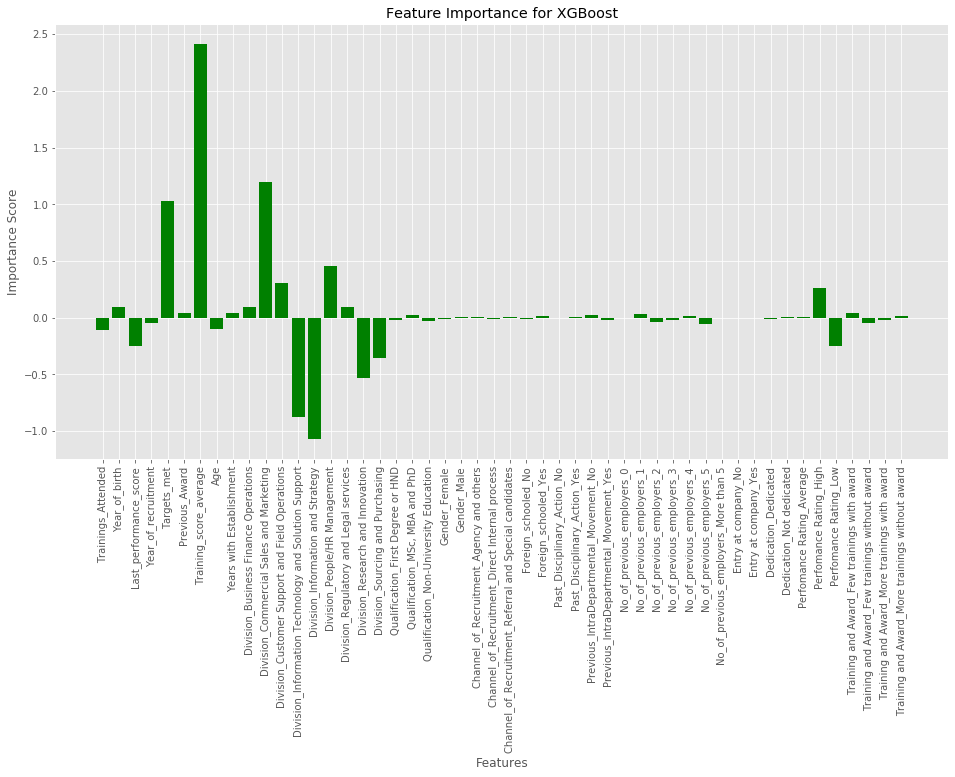

In [0]:
plt.style.use('ggplot')

sv_col = columns
sv_scores = sv.coef_.ravel()

sv_pos = [i for i, _ in enumerate(sv_col)]

plt.figure(figsize=(16,8))
plt.bar(sv_pos, sv_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for XGBoost")
plt.xticks(sv_pos,sv_col,rotation=90)

plt.show()

#### Mean Feature Importance for Models 

In [0]:
Average_colums=['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','XGBoost']
Importance_means=[Logistic_importance_mean,DecisionTree_importance_mean,RandomForest_importance_mean,SVM_importance_mean,xgboost_importance_mean]

#### Bar Chart for Mean Feature Importance (All Models)

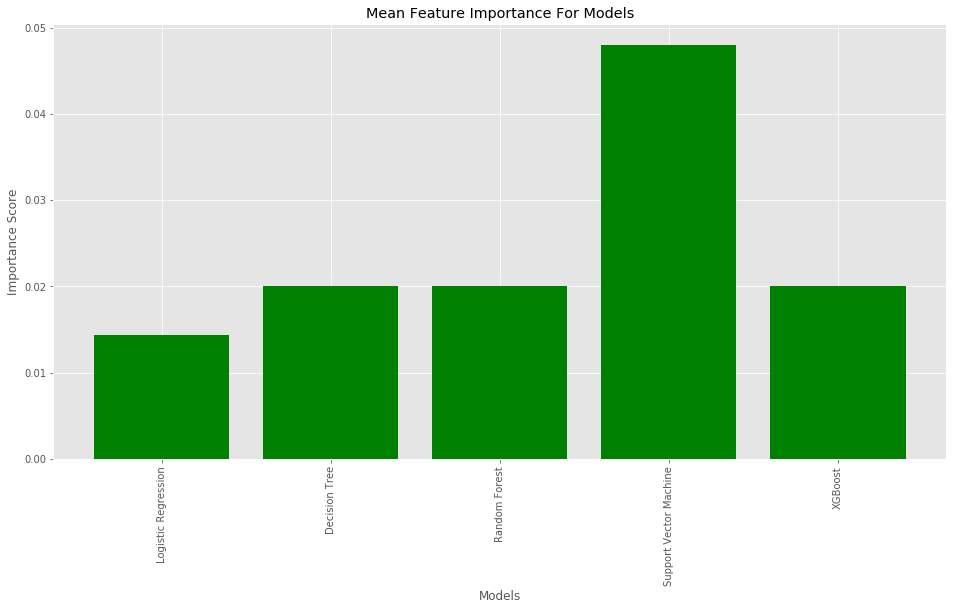

In [0]:
plt.style.use('ggplot')

Model_col = Average_colums


Model_pos = [i for i, _ in enumerate(Model_col)]

plt.figure(figsize=(16,8))
plt.bar(Model_pos, Importance_means, color='green')
plt.xlabel("Models")
plt.ylabel("Importance Score")
plt.title("Mean Feature Importance For Models")
plt.xticks(Model_pos,Model_col,rotation=90)

plt.show()

## Maximum Hard Voting Ensemble Model

#### Importing Voting Classifier from Scikit Learn

In [0]:
from sklearn.ensemble import VotingClassifier

#### Instantiating and Using Hard Voting, Soft Voting and Weighted Hard Voting

In [0]:
voting_clf_hard = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', dtc), ('Random Forest',rf),('SVM',sv),('XGB',xgboost)],
voting = 'hard')

voting_clf_soft = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', dtc), ('Random Forest',rf),('SVM',sv),('XGB',xgboost)],
voting = 'soft')

voting_clf_weighted = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', dtc), ('Random Forest',rf),('SVM',sv),('XGB',xgboost)],
voting = 'hard', weights=[2,1,2,2,3]).fit(X_train,y_train)

#### Comparing  Models Using Their F1 Score

In [0]:
from sklearn import model_selection
labels = ['Logistic Regression', 'Decision Tree', 'Support Vector', 'XGBoost','Random Forest','Hard Voting Ensemble','Soft Voting Ensemble','Weighted Voting Ensemble']
for (clf, label) in zip([lr, dtc,sv,xgboost,rf, voting_clf_hard,voting_clf_soft,voting_clf_weighted], labels):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"))
    print("F1 Score: %0.2f  [%s]" 
          % (scores.mean(),  label))

F1 Score: 0.82  [Logistic Regression]
F1 Score: 0.84  [Decision Tree]
F1 Score: 0.81  [Support Vector]
F1 Score: 0.78  [XGBoost]
F1 Score: 0.96  [Random Forest]
F1 Score: 0.84  [Hard Voting Ensemble]
F1 Score: 0.87  [Soft Voting Ensemble]
F1 Score: 0.83  [Weighted Voting Ensemble]


From the ouput above, the Random Forest Classifiers is the best model having an F1 score of 96%.